In [1]:
# Run the imports we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
mnist = np.genfromtxt('MNIST_Shortened.csv', delimiter=',',
skip_header=1)
# Define X and y
X = mnist[:,0:784]
y = mnist[:,-1]
# Check dimensions of X
X.shape

(6000, 784)

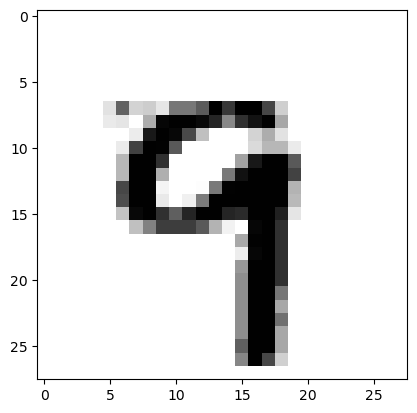

In [9]:
# we can use the Numpy reshape function along with the matplotlib imshow function to visualise
plt.imshow(X[0].reshape(28,28),cmap='gray_r')
plt.show()

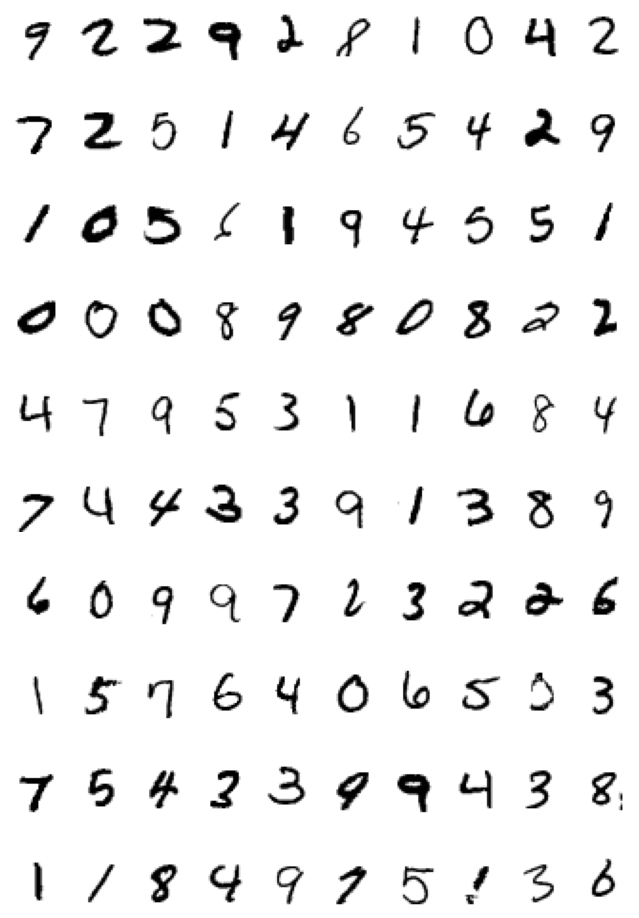

In [13]:
plt.figure(figsize=(8, 12))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(X[np.random.randint(0,6000)].reshape(28,28),cmap='gray_r')
    plt.axis('off')
plt.show()

In [15]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=0, stratify=y)

In [19]:
from sklearn.feature_selection import VarianceThreshold
variance_selector = VarianceThreshold(threshold=0)
X_train_fs = variance_selector.fit_transform(X_train)
X_test_fs = variance_selector.transform(X_test)
print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

118 features have been removed, 666 features remain


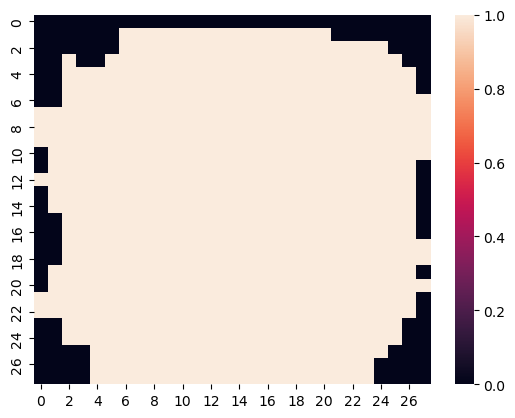

In [23]:
# We can use the get_support function to see which features have been dropped
selected_features = variance_selector.get_support()
selected_features = selected_features.reshape(28,28)
# Visualise which pixels have been dropped
sns.heatmap(selected_features,cmap='rocket')
plt.show()

In [25]:
# Use the SelectKBest selector from sklearn to select the k features with the best scores on a selected test statistic
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=200)
X_train_fs = selector.fit_transform(X_train_fs, y_train)
X_test_fs = selector.transform(X_test_fs)

In [27]:
# Create boolean array for all features
new_features_indices = \
variance_selector.get_support(indices=True)[selector.get_support()] 
new_features_boolean = np.isin(np.arange(784), new_features_indices)

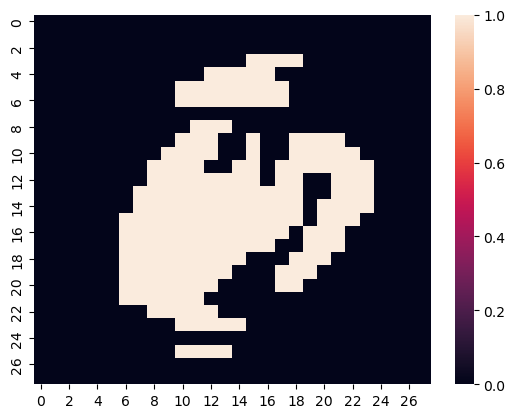

In [29]:
# Reshape and plot as a heatmap
sns.heatmap(new_features_boolean.reshape(28,28),cmap='rocket')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV

In [33]:
# Standardise data before passing to model
scaler = StandardScaler()
X_train_fs = scaler.fit_transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [37]:
rf = RandomForestClassifier(random_state=0) # Use RandomForestClassifier as the base model
rfecv = RFECV(rf, cv=3, step=5)
X_train_fs = rfecv.fit_transform(X_train_fs, y_train)
X_test_fs = rfecv.transform(X_test_fs)
print(f"Number of remaining features: {X_train_fs.shape[1]}")

Number of remaining features: 195


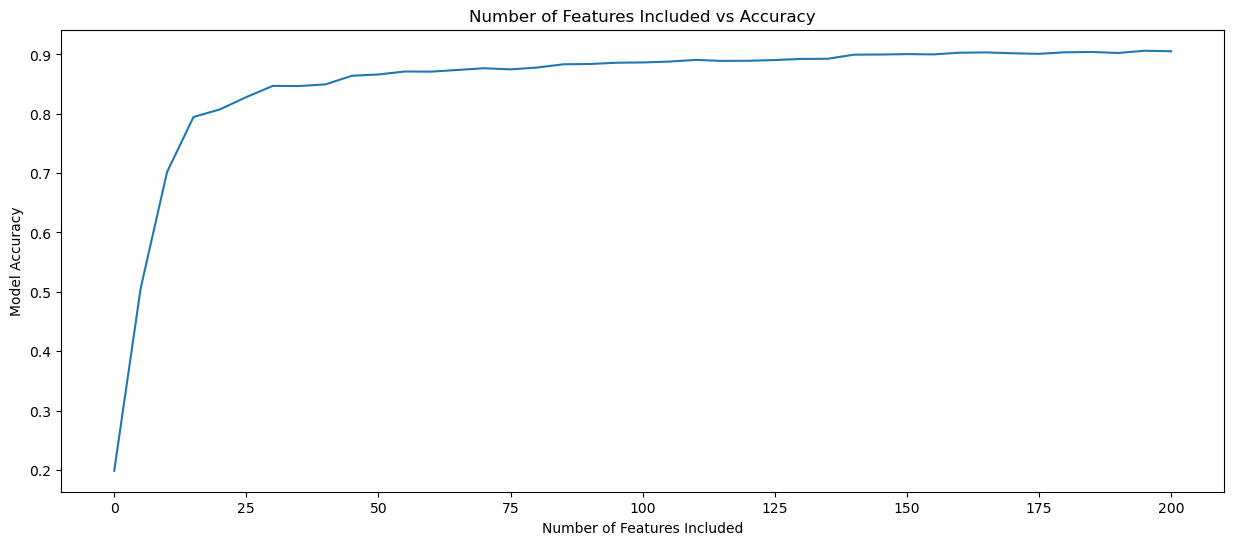

In [40]:
plt.figure( figsize=(15, 6))
plt.title('Number of Features Included vs Accuracy')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy')
plt.plot(np.linspace(0,200,41), rfecv.cv_results_['mean_test_score'])
plt.show()

In [43]:
rf_selectedfeatures = RandomForestClassifier()
rf_selectedfeatures.fit(X_train_fs, y_train)

RandomForestClassifier()

Accuracy Score: 90.94%


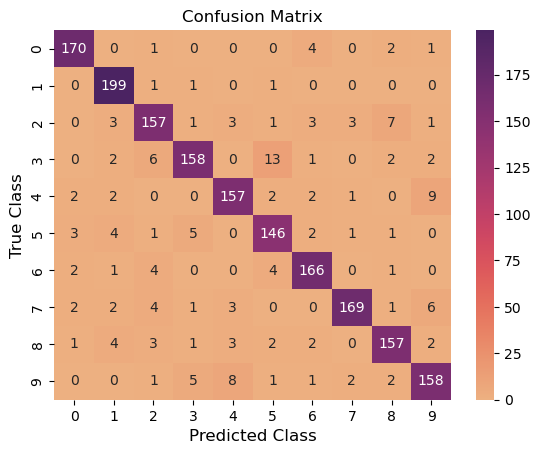

In [45]:
# Make predictions on the test data
y_pred = rf_selectedfeatures.predict(X_test_fs)
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")
cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [47]:
import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
cardio_data = pd.read_csv('Cardiotocographic.csv')
cardio_data.head()
cardio_data.tail()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
2121,140,0.000000,0.000000,0.007426,0.0,0.0,0.0,79,0.2,25,7.2,40,137,177,2
2122,140,0.000775,0.000000,0.006971,0.0,0.0,0.0,78,0.4,22,7.1,66,103,169,2
2123,140,0.000980,0.000000,0.006863,0.0,0.0,0.0,79,0.4,20,6.1,67,103,170,2
2124,140,0.000679,0.000000,0.006110,0.0,0.0,0.0,78,0.4,27,7.0,66,103,169,2
2125,142,0.001616,0.001616,0.008078,0.0,0.0,0.0,74,0.4,36,5.0,42,117,159,1


In [51]:
cardio_data = pd.read_csv('Cardiotocographic.csv')
cardio_data.head()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,1


In [53]:
cardio_data.tail()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
2121,140,0.000000,0.000000,0.007426,0.0,0.0,0.0,79,0.2,25,7.2,40,137,177,2
2122,140,0.000775,0.000000,0.006971,0.0,0.0,0.0,78,0.4,22,7.1,66,103,169,2
2123,140,0.000980,0.000000,0.006863,0.0,0.0,0.0,79,0.4,20,6.1,67,103,170,2
2124,140,0.000679,0.000000,0.006110,0.0,0.0,0.0,78,0.4,27,7.0,66,103,169,2
2125,142,0.001616,0.001616,0.008078,0.0,0.0,0.0,74,0.4,36,5.0,42,117,159,1


In [55]:
cardio_data.describe()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,3.000000


In [57]:
cardio_data['NSP'].value_counts()

NSP
1    1655
2     295
3     176
Name: count, dtype: int64

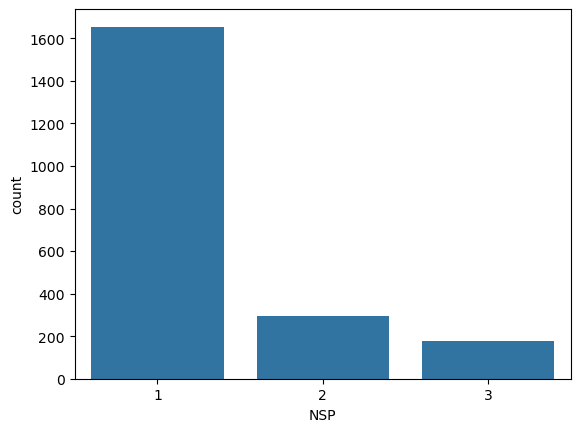

In [59]:
sns.countplot(cardio_data, x="NSP")
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
X = cardio_data.drop('NSP',axis = 1)
y = cardio_data['NSP'] - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=0)

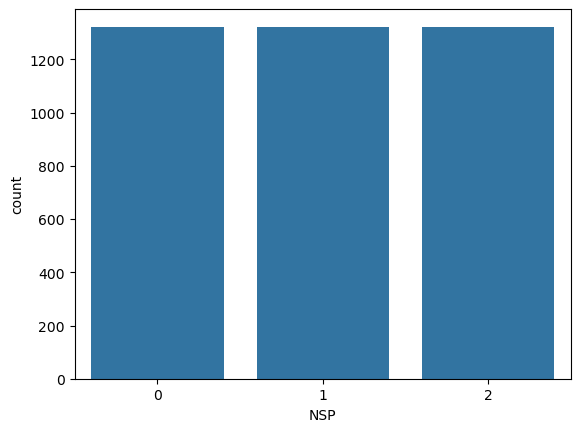

In [65]:
from imblearn.over_sampling import RandomOverSampler
resampler=RandomOverSampler(random_state=0)
X_train_oversampled,y_train_oversampled=resampler.fit_resample(X_train,y_train)
sns.countplot(x=y_train_oversampled)
plt.show()

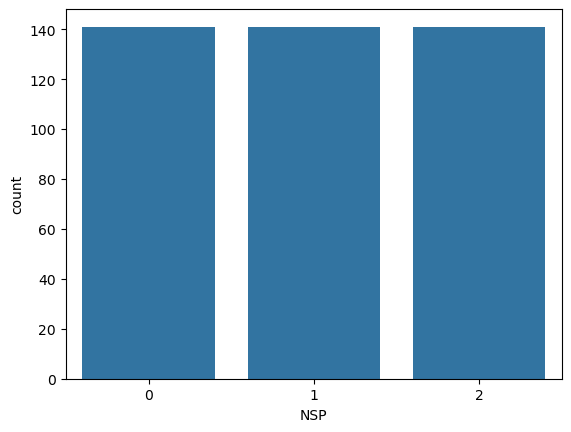

In [69]:
from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler (random_state = 0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)
sns.countplot(x = y_train_undersampled)
plt.show()